In [120]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import re, random
import pandas as pd

In [176]:
n = 20
m = 50
k = 2
max_load = 10
load = [[np.random.randint(1, 8), max_load] for _ in range(n)]
print(load)
epicenters = np.random.choice(range(n), k, replace=False)
for epi in epicenters:
    load[epi][0]=load[epi][1]
print(epicenters)
print(load)

[[5, 10], [2, 10], [3, 10], [4, 10], [3, 10], [2, 10], [3, 10], [1, 10], [2, 10], [6, 10], [2, 10], [3, 10], [2, 10], [3, 10], [2, 10], [1, 10], [3, 10], [2, 10], [4, 10], [3, 10]]
[16  0]
[[10, 10], [2, 10], [3, 10], [4, 10], [3, 10], [2, 10], [3, 10], [1, 10], [2, 10], [6, 10], [2, 10], [3, 10], [2, 10], [3, 10], [2, 10], [1, 10], [10, 10], [2, 10], [4, 10], [3, 10]]


In [177]:
def create_graph(graph, n, m):
    nodes = list(range(n))
    graph.add_nodes_from(nodes)
    edges = []
    if m > n*(n-1)/2:
        m = n*(n-1)/2
    while len(edges) != m:
        nodes1 = nodes.copy()
        n1 = random.choice(nodes1)
        nodes1.pop(n1)
        n2 = random.choice(nodes1)
        if (n1, n2) not in edges and (n2, n1) not in edges:
            edges.append((n1, n2))
    graph.add_edges_from(edges)

In [180]:
def draw(graph, epicenters=[]):
    labels = {node: load[node][0] for node in graph.nodes()}
    pos = nx.circular_layout(graph)
    nx.draw(graph,
            pos,
            node_color='orange',
            node_size=500,
            with_labels=True,
            labels=labels)
    if len(epicenters) > 0:
        nx.draw_networkx_nodes(graph,
                               pos,
                               nodelist=epicenters,
                               node_size=500,
                               alpha=0.7,
                               linewidths=4,
                               node_color="red")


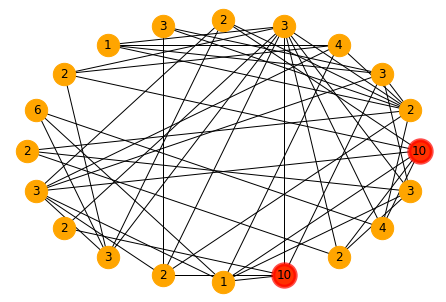

In [181]:
graph = nx.Graph()
create_graph(graph, n, m)
draw(graph, epicenters)

In [182]:
def detect_epicenters(load):
    return [i for i, node in enumerate(load) if node[0] >= node[1]]

In [183]:
epicenters = detect_epicenters(load)
print(epicenters)
for epi in epicenters:
    connected_edges = []
    for edge in graph.edges():
         if epi in edge:
            con_node = edge[1 - edge.index(epi)] 
            if con_node not in epicenters:
                connected_edges.append(con_node)
            
    delta = load[epi][0] / len(connected_edges)
    for ed in connected_edges:
        load[ed][0] += delta 
for epi in epicenters:
    load.pop(epi)
    graph.remove_node(epi)
draw(graph)

[0, 16]


IndexError: list index out of range

In [146]:
graph.remove_node(1)

In [147]:
graph.nodes

NodeView((0, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19))